# LDDS

## Tutorial 2: Lagrangian descriptors for 1 DoF dynamical system with forcing

In this notebook we will show how to calculate Lagrangian descriptors for a forced dynamical systsem with a two-dimensional phase space. This converts the problem into a system with a non-autonomous vector field due to the time-dependent perturbation. We illustrate this use with the Duffing oscillator.

We begin by importing the LDDS module, and from it, all the functions necessary to calculate and plot LDs, and also the ones that define the Duffing vector field and the forcig introduced. 

In [2]:
import os, sys
sys.path.insert(1, os.pardir)
import ldds
from ldds.base import compute_lagrangian_descriptor, perturb_field
from ldds.tools import draw_all_lds
from ldds.vector_fields import Duffing1D, forcing
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### Forced Duffing oscillator

The time-dependent Hamiltonian that describes the forced Doffing oscillator is:

\begin{equation*}
 H(x,p_x,t) = \dfrac{1}{2}p_x^2 - \dfrac{\alpha}{2}x^2 + \dfrac{\beta}{4}x^4 - f(t) x
\end{equation*}

where $\alpha$ and $\beta$ are the model parameters and $f(t)$ is the time-dependent focing added to the system.

The non-autonomous vector field that defines the dynamical system is given by:

\begin{align}
   \dot{x} & = \dfrac{\partial H}{\partial p_x} = f_1(x,p_x) = p_x \\[.2cm]
   \dot{p}_x & = -\dfrac{\partial H}{\partial x} = f_2(x,p_x) = \alpha x - \beta x^3 + f(t)
\end{align}

The LDDS software package offers two different options for the external forcing. The first type of forcing is
$f(t) = A\sin(\omega \, (t+t_0))$ and the second one is $f(t) = A \, \mathrm{sech} \, (t+t_0)\sin(\omega \, (t+t_0))$, where $t = t_0$ represents the initial time. The perturbations are characterized by an amplitude $A$ and a frequency $\omega$. We will test both types of perturbations in this tutorial.

### Define the unperturbed vector field of the Duffing oscillator

In [3]:
# Duffing oscillator parameters
alpha, beta = [1, 1]
vector_field_original = lambda t,u: Duffing1D(t, u, PARAMETERS = [alpha, beta])

### Define 2D spatial grid to compute LDs

In [4]:
# Mesh parameters to calculate LDs

# 2D Domain
x_min, x_max = [-1.6, 1.6]
y_min, y_max = [-1, 1]

# Grid size
Nx, Ny = [400, 400]

grid_parameters = [(x_min, x_max, Nx), (y_min, y_max, Ny)]

### Setup parameters for Lagrangian descriptors

In [6]:
# Integration parameters (Calculate LDs at time t = t0 by integrating trajectories over the
# time interval [t0-tau,t0+tau])

# Initial time to compute LDs
t0 = 0

# Time interval half width
tau = 15

# LDs definition (we will ue the p-value seminorm)
p_value = 0.5

### Setup the type-1 perturbation $f(t) = A\sin(\omega \, (t+t_0))$

In [7]:
# Perturbation parameters
phase_shift, pert_type, amplitude, frequency = [t0, 1, 0.25, np.pi]

# Define perturbation
perturbation = lambda t,u: forcing(t, u, perturbation_params = [phase_shift, pert_type, amplitude, frequency])

# Add the perturbation to the original vector field
vector_field = perturb_field(vector_field_original, perturbation)

### Compute and draw LDs at time $t = t_0$

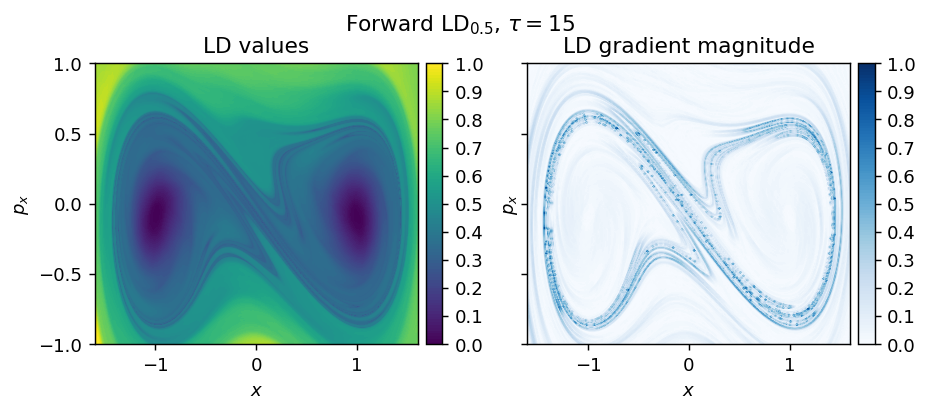

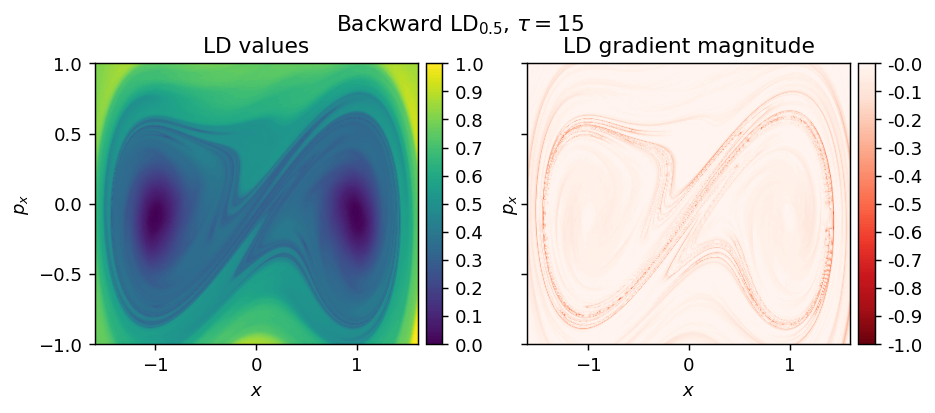

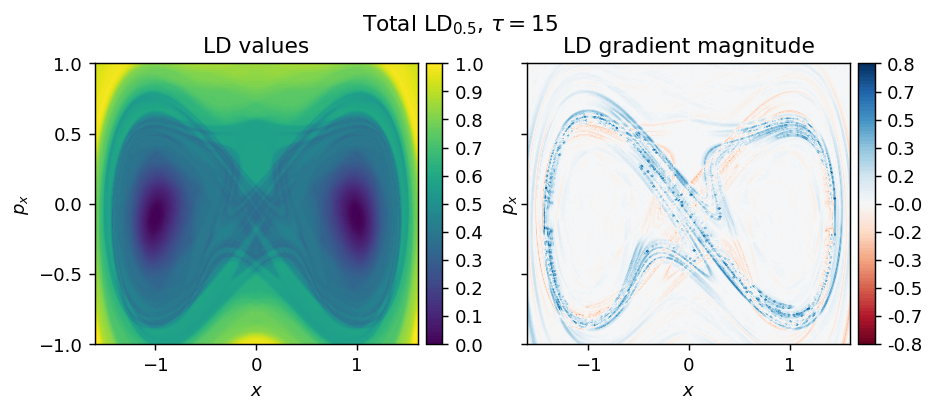

In [8]:
LD_forward = compute_lagrangian_descriptor(grid_parameters, vector_field, tau, p_value)
LD_backward = compute_lagrangian_descriptor(grid_parameters, vector_field, -tau, p_value)

figs = draw_all_lds(LD_forward, LD_backward, grid_parameters, tau, p_value)

### Compute LDs for another initial time

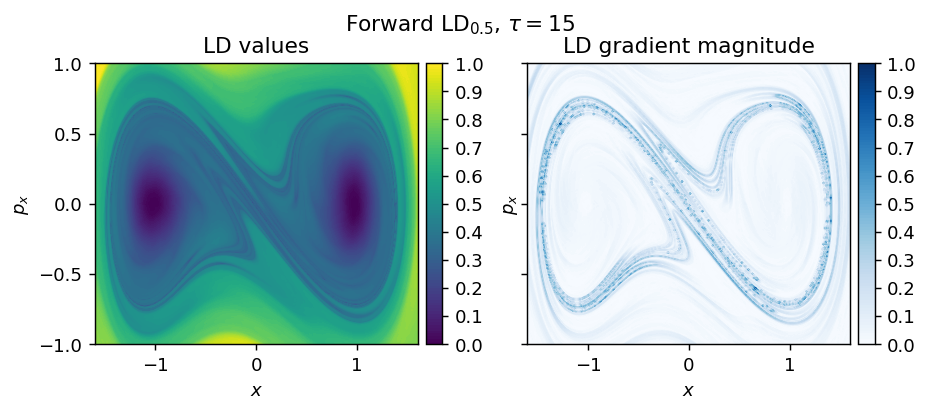

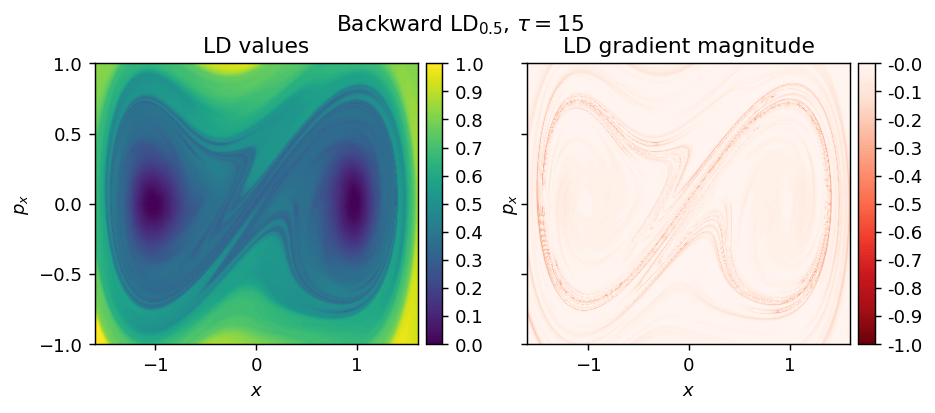

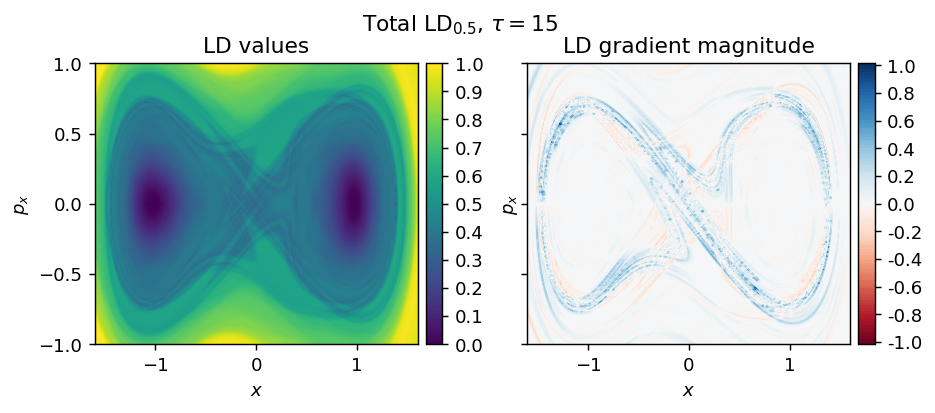

In [9]:
# Setup new initial time
t0 = 0.5

# Perturbation parameters
phase_shift, pert_type, amplitude, frequency = [t0, 1, 0.25, np.pi]

# Define perturbation
perturbation = lambda t,u: forcing(t, u, perturbation_params = [phase_shift, pert_type, amplitude, frequency])

# Add the perturbation to the original vector field
vector_field = perturb_field(vector_field_original, perturbation)

LD_forward = compute_lagrangian_descriptor(grid_parameters, vector_field, tau, p_value)
LD_backward = compute_lagrangian_descriptor(grid_parameters, vector_field, -tau, p_value)

figs = draw_all_lds(LD_forward, LD_backward, grid_parameters, tau, p_value)

Our next goal is to test the other type of forcing that the LDDS package implements. To do so, we first set up again the parameters for the method of Lagrangian descriptors. We will use now the arclength definition of LDs in the computation.

### Setup parameters for Lagrangian descriptors

In [18]:
# Integration parameters for computing LDs at time t = t0 by integrating trajectories 
# over the time interval [t0-tau,t0+tau]

# Initial time to compute LDs
t0 = 0

# Time interval half-width
tau = 15

# LDs definition (we will use the arclength definition)
p_value = 2

### Setup the type-2 perturbation $f(t) = A \, \mathrm{sech} \, (t+t_0)\sin(\omega \, (t+t_0))$

In [19]:
# Perturbation parameters
phase_shift, pert_type, amplitude, frequency = [t0, 2, 0.4, np.pi]

# Define perturbation
perturbation = lambda t,u: forcing(t, u, perturbation_params = [phase_shift, pert_type, amplitude, frequency])

# Add the perturbation to the original vector field
vector_field = perturb_field(vector_field_original, perturbation)

### Compute and draw LDs at time $t = t_0$

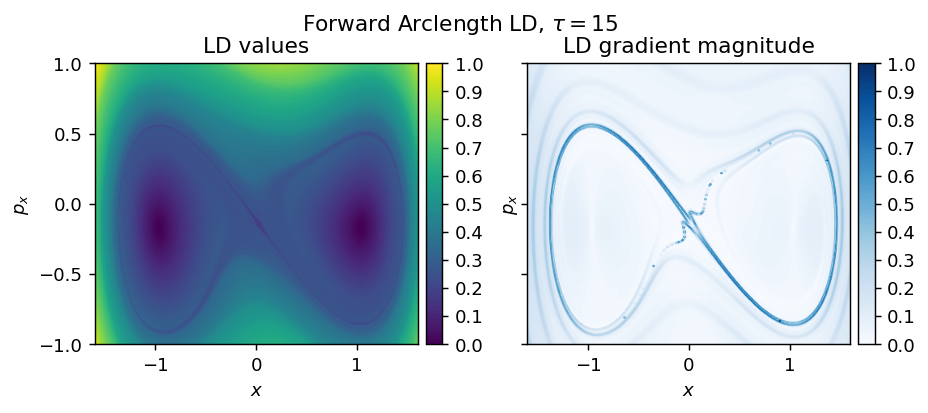

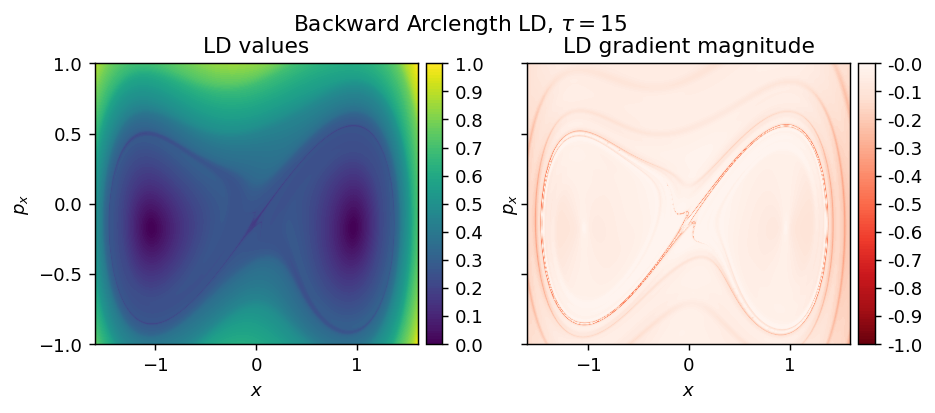

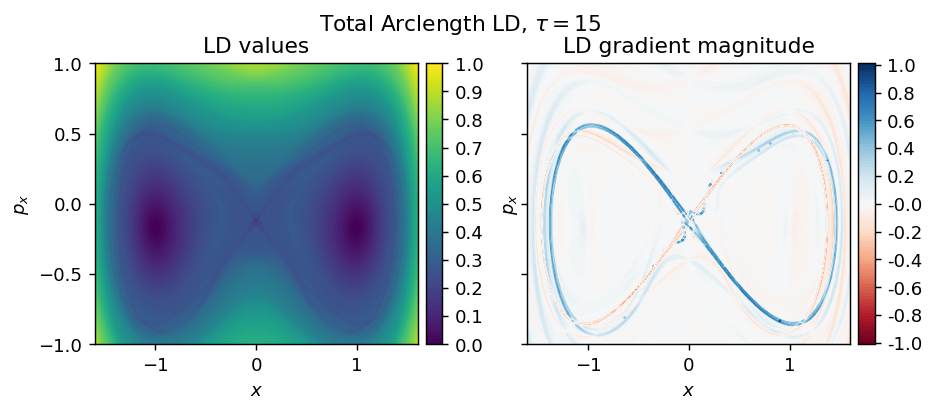

In [15]:
LD_forward = compute_lagrangian_descriptor(grid_parameters, vector_field, tau, p_value)
LD_backward = compute_lagrangian_descriptor(grid_parameters, vector_field, -tau, p_value)

figs = draw_all_lds(LD_forward, LD_backward, grid_parameters, tau, p_value)